In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

cs231n/datasets/cifar-10-batches-py\data_batch_1
(10000L, 3072L)
cs231n/datasets/cifar-10-batches-py\data_batch_2
(10000L, 3072L)
cs231n/datasets/cifar-10-batches-py\data_batch_3
(10000L, 3072L)
cs231n/datasets/cifar-10-batches-py\data_batch_4
(10000L, 3072L)
cs231n/datasets/cifar-10-batches-py\data_batch_5
(10000L, 3072L)
cs231n/datasets/cifar-10-batches-py\test_batch
(10000L, 3072L)
Training data shape:  (50000L, 32L, 32L, 3L)
Training labels shape:  (50000L,)
Test data shape:  (10000L, 32L, 32L, 3L)
Test labels shape:  (10000L,)


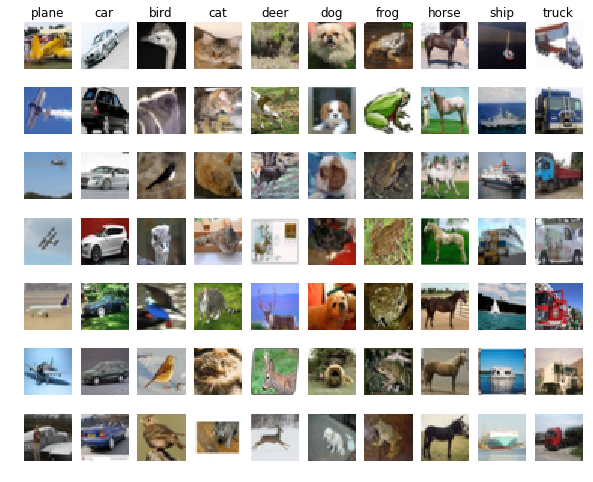

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [6]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print X_train.shape, X_test.shape

(5000L, 3072L) (500L, 3072L)


In [7]:
from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [8]:
dists = classifier.compute_distances_two_loops(X_test)
print dists.shape

(500L, 5000L)


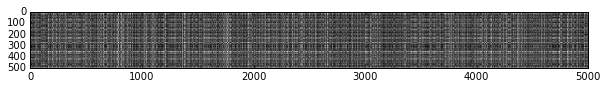

In [9]:
plt.imshow(dists, interpolation='none')
plt.show()

In [10]:
dists = classifier.compute_distances_no_loops(X_test)
print dists.shape

(500L, 5000L)


In [11]:
dists.shape

(500L, 5000L)

In [12]:
classifier.X_train.shape

(5000L, 3072L)

In [13]:
y_train.shape

(5000L,)

In [14]:
X_test.shape

(500L, 3072L)

In [16]:
y_test_pred = classifier.predict_labels(dists, k=1)

In [17]:
y_test_pred.shape

(500L, 1L)

In [18]:
y_test_pred

array([[4],
       [9],
       [8],
       [8],
       [4],
       [4],
       [3],
       [2],
       [5],
       [8],
       [2],
       [8],
       [5],
       [7],
       [2],
       [2],
       [5],
       [3],
       [1],
       [4],
       [2],
       [0],
       [0],
       [6],
       [2],
       [4],
       [2],
       [7],
       [2],
       [6],
       [6],
       [2],
       [4],
       [6],
       [8],
       [7],
       [2],
       [8],
       [4],
       [2],
       [8],
       [6],
       [2],
       [4],
       [9],
       [0],
       [5],
       [0],
       [4],
       [2],
       [7],
       [8],
       [4],
       [3],
       [8],
       [8],
       [5],
       [0],
       [0],
       [4],
       [4],
       [6],
       [6],
       [3],
       [3],
       [2],
       [8],
       [8],
       [3],
       [9],
       [2],
       [4],
       [8],
       [0],
       [4],
       [4],
       [6],
       [3],
       [6],
       [8],
       [8],
       [3],
       [5],
    

In [19]:
y_test

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4,
       9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9,
       3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3,
       7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3,
       8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1,
       3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7,
       2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2,
       1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2,
       3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0,
       5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6,
       5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9,
       9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5,
       0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0,
       6, 6,

In [20]:
y_test.shape

(500L,)

In [22]:
y_test_pred_reshapred = y_test_pred.reshape(500)

In [23]:
y_test_pred_reshapred == y_test

array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True, False, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,

In [24]:
num_correct = np.sum(y_test_pred_reshapred == y_test)

In [25]:
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


In [27]:
y_test_pred = classifier.predict_labels(dists, k=5)

In [28]:
classifier.X_train.shape

(5000L, 3072L)

In [29]:
dists.shape

(500L, 5000L)

In [31]:
dists[0].shape

(5000L,)

In [32]:
closest_y = np.argsort(dists[0])[:1]

In [33]:
closest_y

array([420], dtype=int64)

In [34]:
closest_y.shape

(1L,)

In [35]:
closest_y = np.argsort(dists[0])[:10]

In [36]:
closest_y

array([ 420, 3684, 4224, 1161, 4550, 1728, 3949, 1500,  564, 3218], dtype=int64)

In [37]:
closest_y.shape

(10L,)

In [39]:
classifier.y_train[closest_y]

array([4, 4, 4, 6, 6, 4, 5, 2, 0, 3])

In [42]:
np.unique(classifier.y_train[closest_y], return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([1, 1, 1, 4, 1, 2], dtype=int64))

In [43]:
dict(zip(*np.unique(classifier.y_train[closest_y], return_counts=True)))

{0: 1, 2: 1, 3: 1, 4: 4, 5: 1, 6: 2}

In [54]:
max(dict(zip(*np.unique(classifier.y_train[closest_y], return_counts=True))))

6

In [45]:
y_pp = classifier.y_train[closest_y]

In [50]:
max(dict(zip(*y_pp, return_counts=True)), key=lambda x:y_pp[x])

TypeError: zip() takes no keyword arguments

In [56]:
np.argmax(dict(zip(*np.unique(y_pp, return_counts=True))))

0

In [53]:
np.msort??

In [55]:
x

NameError: name 'x' is not defined

In [57]:
np.argmax(dict(zip(*np.unique(y_pp, return_counts=True))))

0

In [58]:
y_pp

array([4, 4, 4, 6, 6, 4, 5, 2, 0, 3])

In [60]:
np.argmin(dict(zip(*np.unique(y_pp, return_counts=True))).values())

0

In [61]:
counts = np.bincount(y_pp)
print np.argmax(counts)

4


In [62]:
y_pp

array([4, 4, 4, 6, 6, 4, 5, 2, 0, 3])

In [63]:
counts

array([1, 0, 1, 1, 4, 1, 2], dtype=int64)

In [64]:
np.bincount(y_pp).argmax()

4

In [65]:
np.bincount([1, 2, 3, 1, 2, 1, 1, 1, 3, 2, 2, 1]).argmax()

1

In [67]:
y_test_pred = classifier.predict_labels(dists, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000


In [70]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 30 / 500 correct => accuracy: 0.060000


In [69]:
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


In [71]:
dists.shape

(500L, 5000L)

In [72]:
dists[0].shape

(5000L,)

In [73]:
dists[0]

array([ 3803.92350081,  4210.59603857,  5504.0544147 , ...,  4007.64756434,
        4203.28086142,  4354.20256764])

In [74]:
dists[0][np.argsort(dists[0])]

array([ 2641.43408019,  2707.54796818,  2753.57930701, ...,  7697.97947516,
        7819.58285332,  7872.83849701])

In [75]:
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


In [76]:
y_test_pred = classifier.predict_labels(dists, k=11)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 131 / 500 correct => accuracy: 0.262000


In [77]:
y_test_pred = classifier.predict_labels(dists, k=2)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 112 / 500 correct => accuracy: 0.224000


In [78]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000


In [79]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000


In [80]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000


[autoreload of cs231n.classifiers.k_nearest_neighbor failed: Traceback (most recent call last):
  File "e:\python\virtualenv\python27-64-ml\lib\site-packages\IPython\extensions\autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "cs231n\classifiers\k_nearest_neighbor.py", line 169
    y_pred[i] = np.bincount(closest_y).argmax()1
                                               ^
SyntaxError: invalid syntax
]


In [81]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)dists_one = classifier.compute_distances_one_loop(X_test)

Got 139 / 500 correct => accuracy: 0.278000


In [82]:
dists_one = classifier.compute_distances_one_loop(X_test)

In [83]:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
  print 'Good! The distance matrices are the same'
else:
  print 'Uh-oh! The distance matrices are different'

NameError: name 'dists_two' is not defined

In [84]:
difference = np.linalg.norm(dists - dists_one, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
  print 'Good! The distance matrices are the same'
else:
  print 'Uh-oh! The distance matrices are different'

Difference was: 0.000000
Good! The distance matrices are the same


In [85]:
def time_function(f, *args):
  """
  Call a function f with args and return the time (in seconds) that it took to execute.
  """
  import time
  tic = time.time()
  f(*args)
  toc = time.time()
  return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print 'Two loop version took %f seconds' % two_loop_time

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print 'One loop version took %f seconds' % one_loop_time

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print 'No loop version took %f seconds' % no_loop_time

Two loop version took 52.702000 seconds
One loop version took 57.480000 seconds
No loop version took 0.329000 seconds


In [86]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

In [87]:
X_train_folds = np.array_split(X_train, num_folds)

In [88]:
y_train_folds = np.array_split(y_train, num_folds)

In [89]:
y_train_folds

[array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6,
        6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1,
        1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7,
        8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3,
        8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7,
        0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1,
        2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1,
        8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5,
        1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1,
        3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3,
        7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8,
        3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1,
        0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6,

In [90]:
k_to_accuracies = {}


In [106]:
for k in k_choices:
    for i in range(num_folds):
        test_data_X = X_train_folds[i]
        test_data_y = y_train_folds[i]
        
        train_data_X = []
        train_data_y = []
        for j in range(num_folds):
            if i != j:
                train_data_X.append(X_train_folds[j])
                train_data_y.append(y_train_folds[j])
        train_data_X = np.vstack(train_data_X)
        train_data_y = np.hstack(train_data_y)

        k_classifier = KNearestNeighbor()
        k_classifier.train(train_data_X, train_data_y)

        k_y_test_pred = k_classifier.predict(test_data_X, k=k)
        
        k_num_test = test_data_y.shape[0]
        k_num_correct = np.sum(k_y_test_pred == test_data_y)
        k_accuracy = float(k_num_correct) / k_num_test
        print k_accuracy

0.263
0.257
0.264
0.278
0.266
0.239
0.249
0.24
0.266
0.254
0.248
0.266
0.28
0.292
0.28
0.262
0.282
0.273
0.29
0.273
0.265
0.296
0.276
0.284
0.28
0.26
0.295
0.279
0.283
0.28
0.252
0.289
0.278
0.282
0.274
0.27
0.279
0.279
0.282
0.285
0.271
0.288
0.278
0.269
0.266
0.256
0.27
0.263
0.256
0.263


In [107]:
for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
        test_data_X = X_train_folds[i]
        test_data_y = y_train_folds[i]
        
        train_data_X = []
        train_data_y = []
        for j in range(num_folds):
            if i != j:
                train_data_X.append(X_train_folds[j])
                train_data_y.append(y_train_folds[j])
        train_data_X = np.vstack(train_data_X)
        train_data_y = np.hstack(train_data_y)

        k_classifier = KNearestNeighbor()
        k_classifier.train(train_data_X, train_data_y)

        k_y_test_pred = k_classifier.predict(test_data_X, k=k)
        
        k_num_test = test_data_y.shape[0]
        k_num_correct = np.sum(k_y_test_pred == test_data_y)
        k_accuracy = float(k_num_correct) / k_num_test
        k_to_accuracies[k].append(k_accuracy)


In [108]:
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print 'k = %d, accuracy = %f' % (k, accuracy)

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

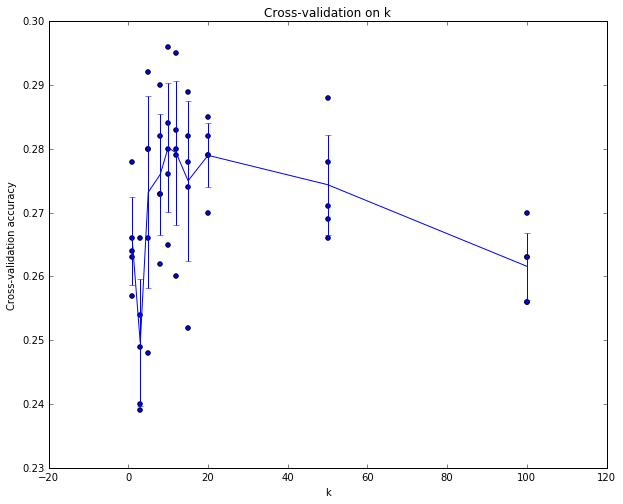

In [109]:
# plot the raw observations
for k in k_choices:
  accuracies = k_to_accuracies[k]
  plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [110]:
best_k = 12

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 128 / 500 correct => accuracy: 0.256000


In [112]:
best_k = 5

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000
